# Data6(엘페이 이용) 분석

In [9]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# set needed variables
plt.rcParams['font.family'] = 'Malgun Gothic' # font
cop_order = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'B01', 
    'C01', 'C02', 'D01', 'D02', 'E01', 'L00', 'L01']

In [11]:
# read data
data6 = pd.read_csv("../Data/privateData/LPOINT_BIG_COMP_06_LPAY.csv", low_memory=False)
data6.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


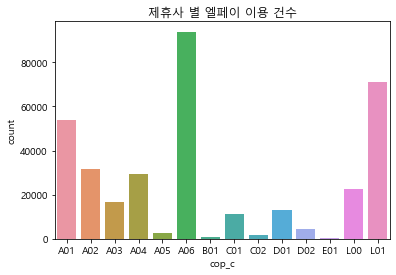

In [12]:
# 엘페이 제휴사 비교
sns.countplot(data=data6, x='cop_c', order=cop_order).set_title("제휴사 별 엘페이 이용 건수")
plt.show()

* A: 유통사, B: 숙박업종, C: 엔터테인먼트, D: F&B, E: 렌탈업종
* L00: 기타 제휴사, L01: 비 제휴사
* 엘페이 제휴사 중 유통사의 비중이 압도적으로 높다
* 엘페이 비 제휴사가 상당한 비중을 차지한다

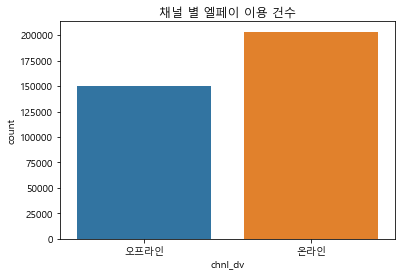

In [13]:
# 엘페이 채널 비교
ax = plt.subplots()
ax = sns.countplot(data=data6, x='chnl_dv')
plt.title("채널 별 엘페이 이용 건수")
ax.set_xticklabels(['오프라인', '온라인'])
plt.show()

* 엘페이는 온라인에서 더 많이 이용된다
* 오프라인 구매 비중이 압도적으로 높았던 것을 감안하면,
    * 온라인 구매 시 엘페이가 많이 사용된다
    * 오프라인 구매 시 엘페이가 거의 사용되지 않는다
    * 추후 Data2와 Data6를 병합하여 비교해보면 좋을것 같다

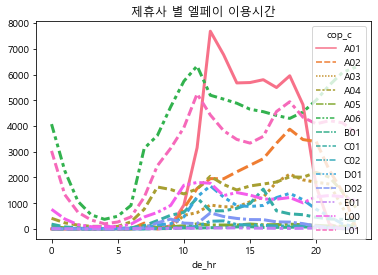

In [14]:
# 제휴사 별 엘페이 이용시간 비교
pivot = pd.pivot_table(data=data6, index='de_hr', columns='cop_c', aggfunc='size', fill_value=0)
sns.lineplot(data=pivot, linewidth=3).set_title('제휴사 별 엘페이 이용시간')
plt.show()

* 온라인에서 많이 사용되는 엘페이 특성 상, 야간 시간대 이용이 눈에 띈다

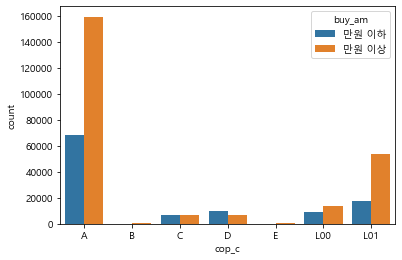

In [15]:
# 제휴사 별 엘페이 이용금액 비교
data6.cop_c = data6.cop_c.apply(lambda x: 
'A' if x in ['A01', 'A02', 'A03', 'A04', 'A05', 'A06'] else 
'B' if x == 'B01' else
'C' if x in ['C01', 'C02'] else 
'D' if x in ['D01', 'D02'] else
'E' if x == 'E01' else x
)
data6.buy_am = data6.buy_am.apply(lambda x: '만원 이하' if x < 10000 else '만원 이상')

sns.countplot(data=data6, x='cop_c', hue='buy_am', 
order=['A', 'B', 'C', 'D', 'E', 'L00', 'L01'], 
hue_order=['만원 이하', '만원 이상'])
plt.show()

* 제휴사 분류에 따른 엘페이 이용금액의 유의미한 차이는 없었다

---
# Data6(엘페이 이용) 분석 결과
* 엘페이 제휴사 중 유통사 비중이 높다
* 엘페이 비 제휴사가 상당한 비중을 차지한다
* 온라인에서 엘페이 이용 비율이 오프라인보다 높다
    * 실제 구매 내역은 오프라인이 압도적으로 많다(Data2 참고)
    * 구매 건수가 압도적으로 적은 온라인에서 엘페이 이용수가 더 많다
    * 엘페이는 온라인에서만 주로 사용됨을 알 수 있다
    * 엘페이는 오프라인에서는 거의 사용되지 않음을 알 수 있다
    * Data2와 Data6를 분석하여, 온/오프라인 구매 당 엘페이 이용 비율 확인이 필요하다